In [12]:
INPUT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
video_dataset_folder = "/data/datasets/NTURGBD"
# ACTION_LABEL_SET = ["A001","A002","A007","A008","A009","A031","A049","A023"]
ACTION_LABEL_SET = ["A006","A024","A026","A027","A035"]
# video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi" #Setup-Camera-Performer-Replication-Action

In [13]:
SEED = 1234
import os
import random
from os import listdir, scandir
from os.path import isfile, isdir, join, exists


setupFolders = [f for f in listdir(video_dataset_folder) if isdir(join(video_dataset_folder, f)) and f[:13]=="nturgbd_rgb_s"]
print(setupFolders)
fileNames = []
fileEntries = []
for folder in setupFolders:
    setupEntryFiles = [f for f in scandir(join(video_dataset_folder,folder,"nturgb+d_rgb/")) 
                       if isfile(join(video_dataset_folder,folder,"nturgb+d_rgb/",f)) 
                       and any(label in f.name for label in ACTION_LABEL_SET)]
    fileEntries += setupEntryFiles
    
#     fileNames.append([f for f in listdir(join(dataset_folder,folder,"nturgb+d_rgb/")) 
#                        if isfile(join(dataset_folder,folder,"nturgb+d_rgb/",f)) 
#                        and any(label in f for label in ACTION_LABEL_SET)])
                       
    fileNames.append([f.name for f in setupEntryFiles])
        
fileNames = sum(fileNames, []) #making it in 1-row
print(len(fileNames)) 
random.seed(SEED)
random.shuffle(fileNames)

['nturgbd_rgb_s003', 'nturgbd_rgb_s008', 'nturgbd_rgb_s009', 'nturgbd_rgb_s005', 'nturgbd_rgb_s013', 'nturgbd_rgb_s001', 'nturgbd_rgb_s007', 'nturgbd_rgb_s015', 'nturgbd_rgb_s002', 'nturgbd_rgb_s004', 'nturgbd_rgb_s006', 'nturgbd_rgb_s010', 'nturgbd_rgb_s016', 'nturgbd_rgb_s017', 'nturgbd_rgb_s012', 'nturgbd_rgb_s011', 'nturgbd_rgb_s014']
4740


## Check that each file has been competely parsed

In [22]:
import os
from os import listdir, scandir
from os.path import isfile, isdir, join #, exists

foldersPerVideo = [
    "Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x",
    "PoseNet-101"
#     "DensePoseKeyPointsMask_ResNet50_FPN_s1x-e2e"
]
folder_names = [f[:-4] for f in fileNames]
analysedVideoFolders = [f.path for f in scandir(INPUT_FOLDER) if isdir(join(INPUT_FOLDER, f)) and f.name in folder_names]

# analysedVideoFolders.sort(key=lambda x: os.path.getmtime(x)) #sort following the last modification time (useful for later as well)

print("Analyzing {} videos".format(len(analysedVideoFolders)))
missingVideoCounter = 0
for video_folder_name in analysedVideoFolders:
    ### check if every video has been analysed with every model ####
    modelFolderPaths = [f.path for f in scandir(video_folder_name) if isdir(f)]
    modelFolders = [f.split("/")[-1] for f in modelFolderPaths]
    if set(modelFolders) != set(foldersPerVideo):
        print("\t",video_folder_name, "doesn't contain", list(set(foldersPerVideo) - set(modelFolders)))
        missingVideoCounter += 1
    
    ### check if every model has been completed ####
    filesPerFolder = list(zip(map(lambda folder: len(listdir(folder)) ,modelFolderPaths),modelFolderPaths)) # take the number of files of each model folder
    maxNumberOfFiles = max(filesPerFolder)[0]
    for numberOfFiles,folderPath in filesPerFolder:
        if numberOfFiles == 0 or numberOfFiles != maxNumberOfFiles:
            print("\tincompleted folder {}".format(folderPath))
            missingVideoCounter += 1

print("\nvideo done: {}/{}\nIncorrect folders: {}".format(len(analysedVideoFolders)-missingVideoCounter/2,len(fileNames),missingVideoCounter))

Analyzing 4740 videos

video done: 4740.0/4740
Incorrect folders: 0


In [17]:
!ls /data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R002A027_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x/

frame0000.pickle  frame0013.pickle  frame0026.pickle  frame0039.pickle
frame0001.pickle  frame0014.pickle  frame0027.pickle  frame0040.pickle
frame0002.pickle  frame0015.pickle  frame0028.pickle  frame0041.pickle
frame0003.pickle  frame0016.pickle  frame0029.pickle  frame0042.pickle
frame0004.pickle  frame0017.pickle  frame0030.pickle  frame0043.pickle
frame0005.pickle  frame0018.pickle  frame0031.pickle  frame0044.pickle
frame0006.pickle  frame0019.pickle  frame0032.pickle  frame0045.pickle
frame0007.pickle  frame0020.pickle  frame0033.pickle  frame0046.pickle
frame0008.pickle  frame0021.pickle  frame0034.pickle  frame0047.pickle
frame0009.pickle  frame0022.pickle  frame0035.pickle  frame0048.pickle
frame0010.pickle  frame0023.pickle  frame0036.pickle  frame0049.pickle
frame0011.pickle  frame0024.pickle  frame0037.pickle  frame0050.pickle
frame0012.pickle  frame0025.pickle  frame0038.pickle


In [18]:
modelFolderPaths = ["/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R002A027_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x/",
                    "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R002A027_rgb/PoseNet-101/"
                   ]
filesPerFolder = list(zip(map(lambda folder: len(listdir(folder)) ,modelFolderPaths),modelFolderPaths)) # take the number of files of each model folder
maxNumberOfFiles = max(filesPerFolder)[0]
#     for numberOfFiles,folderPath in filesPerFolder:

In [21]:
filesPerFolder,maxNumberOfFiles

([(51,
   '/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R002A027_rgb/Detectron2-keypoint_rcnn_X_101_32x8d_FPN_3x/'),
  (51,
   '/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/S009C002P019R002A027_rgb/PoseNet-101/')],
 51)

# Creation of Dataset

In [3]:
import pickle
import numpy as np
import parse

# A1. drink water.
# A2. eat meal/snack.
# A7. throw.
# A8. sitting down.
# A9. standing up (from sitting position).
# A23. hand waving.
# A31. pointing to something with finger.
# A38. salute.
# A49. use a fan (with hand or paper)/feeling warm.

video_folder_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb"
ACTION_LABEL_SET = [1,2,7,8,9,31,49,23]
# ["A001","A002","A007","A008","A009","A031","A049","A023"]


## PoseNet dataset

Posenet predicts: <br>
1 - nose <br>
2 - leftEye <br>
3 - rightEye <br>
4 - leftEar <br>
5 - rightEar <br>
6 - leftShoulder <br>
7 - rightShoulder <br>
8 - leftElbow <br>
9 - rightElbow <br>
10 - leftWrist <br>
11 - rightWrist <br>
12 - leftHip <br>
13 - rightHip <br>
14 - leftKnee <br>
15 - rightKnee <br>
16 - leftAnkle <br>
17 - rightAnkle

In [8]:
poseNetModelName = "PoseNet-101"
densePoseDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
videoFeaturesList = []
videoLabelsList = []
videoSetupList = []
videoCameraList = []
videoPerformerList = []
videoReplicationList = []

for i,avf in enumerate(analysedVideoFolders):
    if i% 100 == 0:
        print("{}/{}".format(i, len(analysedVideoFolders)))
    
    # retrieve the target label from folder name
    setup, camera, performer, replication, target = parse.parse(video_folder_format,avf.split("/")[-1])
    
    if target not in ACTION_LABEL_SET:
        continue
    
    poseNet_folder = avf + "/"+ poseNetModelName
    pose_scores_video = []
#     keypoint_scores_video = [] # ignoring for now
    keypoint_coords_video = []
    framesInFolder = [f for f in listdir(poseNet_folder)]
    framesInFolder.sort() # must be sorted to have the frame in the correct order   
    for frame_file in framesInFolder:
        with open(poseNet_folder+"/"+frame_file,'rb') as file_in:
            pose_scores, keypoint_scores, keypoint_coords = pickle.load(file_in)
        pose_scores_video.append(pose_scores)
#         keypoint_scores_video.append(keypoint_scores) # for now ignoring the keypoints Scores
        keypoint_coords_video.append(keypoint_coords)
    
    # find the pose that along the whole video is the "surest"
    bestPoseIndex = np.argmax(np.mean(pose_scores_video, axis=0)) 
    
    # retrieving the keypoint coordinates for the best pose
    bestPoseKeypointCoords = [k[bestPoseIndex] for k in keypoint_coords_video] 
    
    
    videoFeaturesList.append(bestPoseKeypointCoords)
    videoLabelsList.append(target)
    videoSetupList.append(setup)
    videoCameraList.append(camera)
    videoPerformerList.append(performer)
    videoReplicationList.append(replication)

    
# saving dataset WITHOUT PADDING
videoFeatures = np.asarray(videoFeaturesList)
videoLabels = np.asarray(videoLabelsList)
videoSetups = np.asarray(videoSetupList)
videoCameras= np.asarray(videoCameraList)
videoPerformers = np.asarray(videoPerformerList)
videoReplications = np.asarray(videoReplicationList)

with open(densePoseDatasetName, 'wb') as handle:
    pickle.dump((videoFeatures, 
                 videoLabels,
                 videoSetups,
                 videoCameras,
                 videoPerformers,
                 videoReplications), handle, protocol=pickle.HIGHEST_PROTOCOL)
          
print("Done!")

0/8532
100/8532
200/8532
300/8532
400/8532
500/8532
600/8532
700/8532
800/8532
900/8532
1000/8532
1100/8532
1200/8532
1300/8532
1400/8532
1500/8532
1600/8532
1700/8532
1800/8532
1900/8532
2000/8532
2100/8532
2200/8532
2300/8532
2400/8532
2500/8532
2600/8532
2700/8532
2800/8532
2900/8532
3000/8532
3100/8532
3200/8532
3300/8532
3400/8532
3500/8532
3600/8532
3700/8532
3800/8532
3900/8532
4000/8532
4100/8532
4200/8532
4300/8532
4400/8532
4500/8532
4600/8532
4700/8532
4800/8532
4900/8532
5000/8532
5100/8532
5200/8532
5300/8532
5400/8532
5500/8532
5600/8532
5700/8532
5800/8532
5900/8532
6000/8532
6100/8532
6200/8532
6300/8532
6400/8532
6500/8532
6600/8532
6700/8532
6800/8532
6900/8532
7000/8532
7100/8532
7200/8532
7300/8532
7400/8532
7500/8532
7600/8532
7700/8532
7800/8532
7900/8532
8000/8532
8100/8532
8200/8532
8300/8532
8400/8532
8500/8532
Done!


In [9]:
poseNetModelName = "PoseNet-101"
densePoseDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
with open(densePoseDatasetName,'rb') as file_in:
    readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

In [10]:
len(readLabels) 

7584

## Detectron2 dataset

Detectron2 predicts: <br>
1 - nose <br>
2 - left_eye <br>
3 - right_eye <br>
4 - left_ear <br>
5 - right_ear <br>
6 - left_shoulder <br>
7 - right_shoulder <br>
8 - left_elbow <br>
9 - right_elbow <br>
10 - left_wrist <br>
11 - right_wrist <br>
12 - left_hip <br>
13 - right_hip <br>
14 - left_knee <br>
15 - right_knee <br>
16 - left_ankle <br>
17 - right_ankle

In [11]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [12]:
import cv2
import parse
import pickle
import torch, torchvision
print(torch.__version__)
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
#from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

1.3.1


In [13]:
detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
videoFeaturesList = []
videoLabelsList = []
videoSetupList = []
videoCameraList = []
videoPerformerList = []
videoReplicationList = []
for i, avf in enumerate(analysedVideoFolders):
    if i% 100 == 0:
        print("{}/{}".format(i, len(analysedVideoFolders)))
        
    # retrieve the target label from folder name
    setup, camera, performer, replication, target = parse.parse(video_folder_format,avf.split("/")[-1])
    
    if target not in ACTION_LABEL_SET:
        continue
        
    detectron2_folder = avf + "/Detectron2-"+ detectron2ModelName
    framesInFolder = [f for f in listdir(detectron2_folder)]
    framesInFolder.sort() # must be sorted to have the frame in the correct order   
    keypoints_video = []
    for frame_file in framesInFolder:
        with open(detectron2_folder+"/"+frame_file,'rb') as file_in:
            outputsRead = pickle.load(file_in)
#         if len(outputsRead['instances']) > 1:
#             print(detectron2_folder+"/"+frame_file, "has more than 1 pose")

        instancesFields = outputsRead['instances'].get_fields()

        # get only the most sure pose (Detectron sorts them for us)
        keypoints_frame = np.array(instancesFields['pred_keypoints'][0].cpu()) 
        keypoints_frame = [[k[0],k[1]] for k in keypoints_frame] #removing the third value (which I still didn't understand what it means)
        keypoints_video.append(keypoints_frame)

    videoFeaturesList.append(keypoints_video)
    videoLabelsList.append(target)
    videoSetupList.append(setup)
    videoCameraList.append(camera)
    videoPerformerList.append(performer)
    videoReplicationList.append(replication)

# saving dataset WITHOUT PADDING
videoFeatures = np.asarray(videoFeaturesList)
videoLabels = np.asarray(videoLabelsList)
videoSetups = np.asarray(videoSetupList)
videoCameras = np.asarray(videoCameraList)
videoPerformers = np.asarray(videoPerformerList)
videoReplications = np.asarray(videoReplicationList)

with open(detectron2datasetName, 'wb') as handle:
    pickle.dump((videoFeatures, 
                 videoLabels,
                 videoSetups,
                 videoCameras,
                 videoPerformers,
                 videoReplications), handle, protocol=pickle.HIGHEST_PROTOCOL)
         
print("Done!")

0/8532
100/8532
200/8532
300/8532
400/8532
500/8532
600/8532
700/8532
800/8532
900/8532
1000/8532
1100/8532
1200/8532
1300/8532
1400/8532
1500/8532
1600/8532
1700/8532
1800/8532
1900/8532
2000/8532
2100/8532
2200/8532
2300/8532
2400/8532
2500/8532
2600/8532
2700/8532
2800/8532
2900/8532
3000/8532
3100/8532
3200/8532
3300/8532
3400/8532
3500/8532
3600/8532
3700/8532
3800/8532
3900/8532
4000/8532
4100/8532
4200/8532
4300/8532
4400/8532
4500/8532
4600/8532
4700/8532
4800/8532
4900/8532
5000/8532
5100/8532
5200/8532
5300/8532
5400/8532
5500/8532
5600/8532
5700/8532
5800/8532
5900/8532
6000/8532
6100/8532
6200/8532
6300/8532
6400/8532
6500/8532
6600/8532
6700/8532
6800/8532
6900/8532
7000/8532
7100/8532
7200/8532
7300/8532
7400/8532
7500/8532
7600/8532
7700/8532
7800/8532
7900/8532
8000/8532
8100/8532
8200/8532
8300/8532
8400/8532
8500/8532
Done!


In [82]:
# videoFeatures.shape
# keypoints_frame_new = [[k[0],k[1]] for k in keypoints_frame]
# keypoints_frame_new
# keypoints_frame
# videoSetups,videoCameras,videoPerformers,videoReplications

(array([10]), array([3]), array([17]), array([1]))

In [14]:
detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
with open(detectron2datasetName,'rb') as file_in:
    readFeaturesD2, readLabelsD2, readSetupsD2, readCamerasD2, readPerformersD2, readReplicationsD2 = pickle.load(file_in)
len(readLabelsD2)

7584

# Dataset Senesi-like

In [1]:
# INPUT_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"
# video_dataset_folder = "/data/datasets/NTURGBD"
# ACTION_LABEL_SET = ["A001","A002","A007","A008","A009","A031","A049","A023"] # mine
# ACTION_LABEL_SET = ["A006","A024","A026","A027","A035"] # different from Senesi
# ACTION_LABEL_SET = ["A007","A008","A009","A023","A031"] # common with Senesi
# ACTION_LABEL_SET = ["A006","A007","A008","A009","A023","A024","A026","A027","A031","A035"] # Senesi's
# video_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb.avi" #Setup-Camera-Performer-Replication-Action

In [24]:
import parse
from os.path import basename
folder_name_format = "S{:3d}C{:3d}P{:3d}R{:3d}A{:3d}_rgb" #Setup-Camera-Performer-Replication-Action
def getSetupFromFolderPath(folderPath):
    setup, camera, performer, replication, label = parse.parse(folder_name_format,basename(folderPath))
    return setup, camera, performer, replication, label

In [25]:
from os import scandir, listdir
def getPoseNetResult(labelsToAnalyse, inputFolder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"):
    print("retrieving PoseNet points from input folders...")
    poseNetModelName = "PoseNet-101"
    # poseNetDatasetName = DATASET_FOLDER+poseNetModelName+"-dataset.pickle"
    videoFeaturesList = []
    videoLabelsList = []
    videoSetupList = []
    videoCameraList = []
    videoPerformerList = []
    videoReplicationList = []
    
    videoFoldersToAnalyse = [f.path for f in scandir(inputFolder) if isdir(join(inputFolder, f)) and getSetupFromFolderPath(f)[4] in labelsToAnalyse]
    
    print("found {} folders for {}".format(len(videoFoldersToAnalyse), poseNetModelName))

    for i,avf in enumerate(videoFoldersToAnalyse):
        if i% 100 == 0:
            print("{}/{}".format(i, len(videoFoldersToAnalyse)))

        # retrieve the target label from folder name
        setup, camera, performer, replication, target = getSetupFromFolderPath(avf)
#           parse.parse(video_folder_format,avf.split("/")[-1])

        assert target in labelsToAnalyse 
#         if target not in ACTION_LABEL_SET:
#             continue

        poseNet_folder = avf + "/"+ poseNetModelName
        pose_scores_video = []
    #     keypoint_scores_video = [] # ignoring for now
        keypoint_coords_video = []
        framesInFolder = [f for f in listdir(poseNet_folder)]
        framesInFolder.sort() # must be sorted to have the frame in the correct order   
        for frame_file in framesInFolder:
            with open(poseNet_folder+"/"+frame_file,'rb') as file_in:
                pose_scores, keypoint_scores, keypoint_coords = pickle.load(file_in)
            pose_scores_video.append(pose_scores)
    #         keypoint_scores_video.append(keypoint_scores) # for now ignoring the keypoints Scores
            keypoint_coords_video.append(keypoint_coords)

        # find the pose that along the whole video is the "surest"
        bestPoseIndex = np.argmax(np.mean(pose_scores_video, axis=0)) 

        # retrieving the keypoint coordinates for the best pose
        bestPoseKeypointCoords = [k[bestPoseIndex] for k in keypoint_coords_video] 


        videoFeaturesList.append(bestPoseKeypointCoords)
        videoLabelsList.append(target)
        videoSetupList.append(setup)
        videoCameraList.append(camera)
        videoPerformerList.append(performer)
        videoReplicationList.append(replication)


    # converting to ndarray
    videoFeatures = np.asarray(videoFeaturesList)
    videoLabels = np.asarray(videoLabelsList)
    videoSetups = np.asarray(videoSetupList)
    videoCameras= np.asarray(videoCameraList)
    videoPerformers = np.asarray(videoPerformerList)
    videoReplications = np.asarray(videoReplicationList)
          
    #final assertion (just to be sure)
    assert len(videoFoldersToAnalyse) == len(videoFeatures) == len(videoLabels) == len(videoSetups) == len(videoCameras) == len(videoPerformers) == len(videoReplications)

    return videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications

In [31]:
def getDetectronResult(labelsToAnalyse, inputFolder = "/data/students_home/amoscatelli/Desktop/actionAnalysis/inputData/"):
    print("retrieving detectron points from input folders...")
    detectron2ModelName = "keypoint_rcnn_X_101_32x8d_FPN_3x"
#     detectron2datasetName = DATASET_FOLDER+detectron2ModelName+"-dataset.pickle"
    videoFeaturesList = []
    videoLabelsList = []
    videoSetupList = []
    videoCameraList = []
    videoPerformerList = []
    videoReplicationList = []
    
    videoFoldersToAnalyse = [f.path for f in scandir(inputFolder) if isdir(join(inputFolder, f)) and getSetupFromFolderPath(f)[4] in labelsToAnalyse]
    
    
    print("found {} folders for {}".format(len(videoFoldersToAnalyse), detectron2ModelName))
    
    for i, avf in enumerate(videoFoldersToAnalyse):
        if i% 100 == 0:
            print("{}/{}".format(i, len(videoFoldersToAnalyse)))

        # retrieve the target label from folder name
        setup, camera, performer, replication, target = getSetupFromFolderPath(avf)
        
        assert target in labelsToAnalyse 

        detectron2_folder = avf + "/Detectron2-"+ detectron2ModelName
        framesInFolder = [f for f in listdir(detectron2_folder)]
        framesInFolder.sort() # must be sorted to have the frame in the correct order   
        keypoints_video = []
        
        for fIdx,frame_file in enumerate(framesInFolder):
            with open(detectron2_folder+"/"+frame_file,'rb') as file_in:
                outputsRead = pickle.load(file_in)
    #         if len(outputsRead['instances']) > 1:
    #             print(detectron2_folder+"/"+frame_file, "has more than 1 pose")

            if len(outputsRead['instances']) == 0:
                # in case of no pose is detected we fill the features with zeros
                keypoints_frame = np.ndarray.tolist(np.zeros((17,2)))
                print(" for video {}-{} the frame {} is filled with zeros".format(i,basename(avf),fIdx))
            else:
                instancesFields = outputsRead['instances'].get_fields()

                # get only the most sure pose (Detectron sorts them for us)
                keypoints_frame = np.array(instancesFields['pred_keypoints'][0].cpu()) 
                keypoints_frame = [[k[0],k[1]] for k in keypoints_frame] #removing the third value (which I still didn't understand what it means)

            keypoints_video.append(keypoints_frame)

        videoFeaturesList.append(keypoints_video)
        videoLabelsList.append(target)
        videoSetupList.append(setup)
        videoCameraList.append(camera)
        videoPerformerList.append(performer)
        videoReplicationList.append(replication)
        
    # converting to ndarray
    videoFeatures = np.asarray(videoFeaturesList)
    videoLabels = np.asarray(videoLabelsList)
    videoSetups = np.asarray(videoSetupList)
    videoCameras= np.asarray(videoCameraList)
    videoPerformers = np.asarray(videoPerformerList)
    videoReplications = np.asarray(videoReplicationList)
          
    #final assertion (just to be sure)
    assert len(videoFoldersToAnalyse) == len(videoFeatures) == len(videoLabels) == len(videoSetups) == len(videoCameras) == len(videoPerformers) == len(videoReplications)

    return videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications

# Creating Senesi's dataset

In [32]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [33]:
def getStringList(labels, setups, cameras, performers, replications):
    strList = []
    for i in range(len(labels)):
        strList.append("{} {} {} {} {}".format(labels[i],setups[i],cameras[i],performers[i],replications[i]))
    return strList

In [34]:
import numpy as np
import pickle
from sklearn.model_selection import StratifiedShuffleSplit
from os.path import isdir,join

modelNames = ["keypoint_rcnn_X_101_32x8d_FPN_3x"
              ,"PoseNet-101"
             ]
labelInCommon = [7,8,9,23,31]
# ACTION_LABEL_SET = ["A006","A024","A026","A027","A035"] # different from Senesi
labelToReadFromInput = [6,24,26,27,35]
TEST_SIZE = 0.1
VAL_SIZE = 0.2
sss = None
for modelName in modelNames:
    print("### Model:",modelName,"###")
    datasetName = DATASET_FOLDER+modelName+"-dataset.pickle"
    print("### Loading",datasetName,"###")
    with open(datasetName,'rb') as file_in:
        readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

    indexToTake = np.concatenate(([np.where(readLabels == x)[0] for x in labelInCommon]))
    
    commonFeature = readFeatures[indexToTake]
    commonLabels = readLabels[indexToTake]
    commonSetup = readSetups[indexToTake]
    commonCameras = readCameras[indexToTake]
    commonPerformers = readPerformers[indexToTake]
    commonReplications = readReplications[indexToTake]
    
    assert 4740 == len(commonFeature) == len(commonLabels) == len(commonSetup) == len(commonCameras) == len(commonPerformers) == len(commonReplications)
    
    if modelName == "PoseNet-101":
        videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications = getPoseNetResult(labelToReadFromInput)
    elif modelName == "keypoint_rcnn_X_101_32x8d_FPN_3x":
            videoFeatures,videoLabels,videoSetups,videoCameras,videoPerformers,videoReplications = getDetectronResult(labelToReadFromInput)
    else:
        raise Exception("model name {} unknown".format(modelName)) 
    
    # MERGING COMMON ONES WITH READ ONES
    features = np.concatenate((commonFeature, videoFeatures))
    labels = np.concatenate((commonLabels, videoLabels))
    setups = np.concatenate((commonSetup, videoSetups))
    cameras = np.concatenate((commonCameras, videoCameras))
    performers = np.concatenate((commonPerformers, videoPerformers))
    replications = np.concatenate((commonReplications, videoReplications))
    
    globalSet = [features, labels, setups, cameras, performers, replications]
    
    # TRAIN-TEST splitting
    ## first splitting -> it will become reference
    if sss is None:
        print("### creating train-val-test set for the first time ###")
        sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE)
        for train_val_idx, test_idx in sss.split(features, labels):
            trainValSet = [el[train_val_idx] for el in globalSet]
            testSet = [el[test_idx] for el in globalSet]
        # TRAIN-VAL splitting
        sss = StratifiedShuffleSplit(n_splits=1, test_size=VAL_SIZE)
        for train_idx, val_idx in sss.split(trainValSet[0], trainValSet[1]):
            trainSet = [el[train_idx] for el in trainValSet]
            valSet = [el[val_idx] for el in trainValSet]
        
        stringListTrain = getStringList(*trainSet[1:])
        stringListVal = getStringList(*valSet[1:])
        stringListTest = getStringList(*testSet[1:])
        
    else:
        print("### creating train-val-test as the previous one ###")        
        stringListGlobal = getStringList(*globalSet[1:])

        print("get the indexes of train-val-test elements")
        train_idx = [stringListGlobal.index(el) for el in stringListTrain]
        val_idx = [stringListGlobal.index(el) for el in stringListVal]
        test_idx = [stringListGlobal.index(el) for el in stringListTest]

        print("creating the train-val-test set following the previously calculated indexes")
        trainSet = [el[train_idx] for el in globalSet]
        valSet = [el[val_idx] for el in globalSet]
        testSet = [el[test_idx] for el in globalSet]

    
    datasetResultName = DATASET_FOLDER+modelName+"-SPLIT-SENESI-dataset.pickle"
    print("Dumping the result in ",datasetResultName)
    with open(datasetResultName, 'wb') as handle:
        pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)        
        
print("DONE!")

### Model: keypoint_rcnn_X_101_32x8d_FPN_3x ###
### Loading /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-dataset.pickle ###
retrieving detectron points from input folders...
found 4740 folders for keypoint_rcnn_X_101_32x8d_FPN_3x
0/4740
 for video 39-S014C002P039R002A006_rgb the frame 43 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 44 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 45 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 46 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 47 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 48 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 49 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 50 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 51 is filled with zeros
 for video 39-S014C002P039R002A006_rgb the frame 53 is

 for video 779-S014C003P015R001A006_rgb the frame 32 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 33 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 34 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 35 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 36 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 37 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 38 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 39 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 40 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 41 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 42 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 43 is filled with zeros
 for video 779-S014C003P015R001A006_rgb the frame 44 is filled with zeros
 for video 779-S014C003P015R001A006_rg

1200/4740
 for video 1258-S016C003P039R001A035_rgb the frame 38 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 39 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 40 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 41 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 42 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 43 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 44 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 45 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 46 is filled with zeros
 for video 1258-S016C003P039R001A035_rgb the frame 47 is filled with zeros
1300/4740
 for video 1315-S010C002P015R002A035_rgb the frame 24 is filled with zeros
1400/4740
 for video 1470-S002C002P012R002A006_rgb the frame 41 is filled with zeros
 for video 1470-S002C002P012R002A006_rgb the frame 42 is filled with z

2300/4740
 for video 2314-S010C002P007R002A035_rgb the frame 22 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 23 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 24 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 25 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 26 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 27 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 28 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 29 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 30 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 31 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 32 is filled with zeros
 for video 2314-S010C002P007R002A035_rgb the frame 33 is filled with zeros
 for video 2333-S013C003P025R001A035_rgb the frame 45 is filled with zeros
 for video 2333

3200/4740
3300/4740
3400/4740
 for video 3420-S006C002P001R002A035_rgb the frame 33 is filled with zeros
 for video 3420-S006C002P001R002A035_rgb the frame 34 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 32 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 33 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 34 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 35 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 36 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 37 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 38 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 39 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 40 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 41 is filled with zeros
 for video 3453-S017C002P016R002A006_rgb the frame 42 is filled with z

 for video 4366-S012C001P028R001A006_rgb the frame 24 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 25 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 26 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 27 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 28 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 29 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 30 is filled with zeros
 for video 4366-S012C001P028R001A006_rgb the frame 31 is filled with zeros
4400/4740
 for video 4479-S008C002P036R002A006_rgb the frame 36 is filled with zeros
4500/4740
4600/4740
 for video 4609-S014C003P015R001A035_rgb the frame 35 is filled with zeros
 for video 4609-S014C003P015R001A035_rgb the frame 36 is filled with zeros
 for video 4609-S014C003P015R001A035_rgb the frame 37 is filled with zeros
 for video 4609-S014C003P015R001A035_rgb the frame 38 is filled with z

## Check if the datasets are equal

In [2]:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"

In [35]:
import pickle

dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_1)
with open(dataset_1,"rb") as file_in:
        trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)

dataset_2 = DATASET_FOLDER+"PoseNet-101-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_2)
with open(dataset_2,"rb") as file_in:
        trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)

Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-SPLIT-SENESI-dataset.pickle


In [36]:
for i in range(1,6):
    print(i)
    assert all(trainSet_1[i] == trainSet_2[i])
    assert all(valSet_1[i] == valSet_2[i])
    assert all(testSet_1[i] == testSet_2[i])

1
2
3
4
5


## display balancing of splitting

In [37]:
import pickle

dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_1)
with open(dataset_1,"rb") as file_in:
        trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)

dataset_2 = DATASET_FOLDER+"PoseNet-101-SPLIT-SENESI-dataset.pickle"
print("Loading ",dataset_2)
with open(dataset_2,"rb") as file_in:
        trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)
print("Done!")

Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-SENESI-dataset.pickle
Loading  /data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/PoseNet-101-SPLIT-SENESI-dataset.pickle


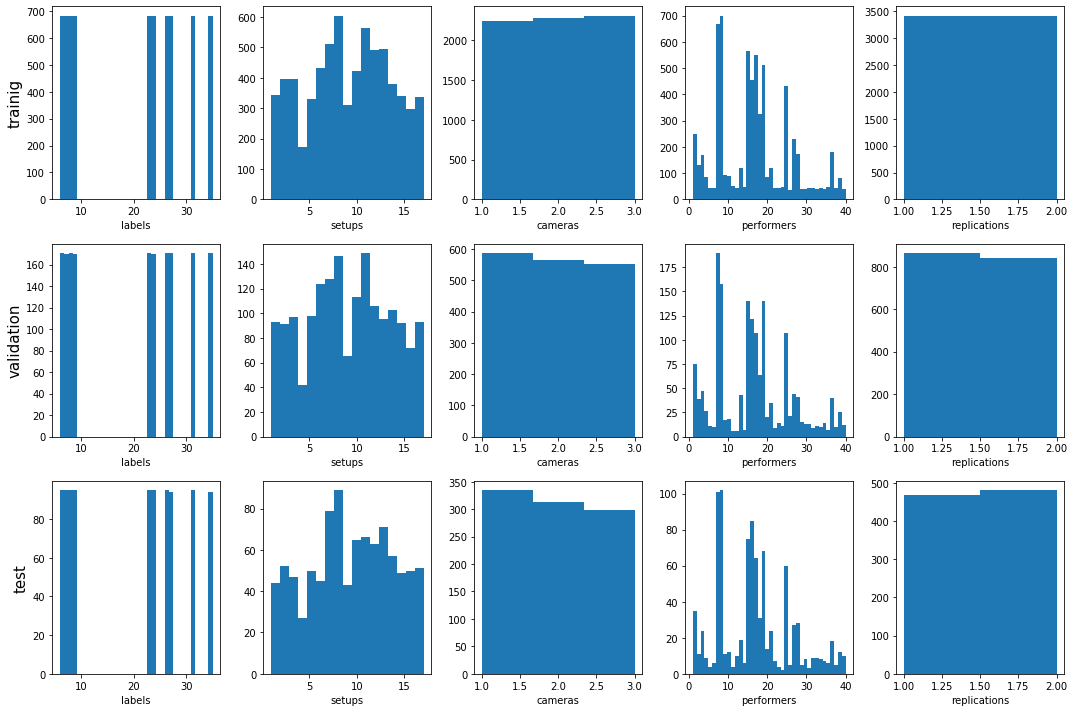

In [40]:
import matplotlib.pyplot as plt

xLabels = ["labels", "setups", "cameras", "performers", "replications"]
yLabels = ["trainig", "validation", "test"]
fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
for ids, dataSet in enumerate([trainSet_1, valSet_1, testSet_1]):
# for ids, dataSet in enumerate([trainSet_2, valSet_2, testSet_2]):
    axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
    for iid, data in enumerate(dataSet[1:]):
        axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
        axes[ids][iid].hist(data, bins = max(data))
fig.tight_layout()
plt.show()

# splitting a dataset in train-val-test

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
import pickle

TEST_SIZE = 0.1
VAL_SIZE = 0.2
modelNames = ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]
for modelName in modelNames:
    datasetName = DATASET_FOLDER+modelName+"-dataset.pickle"
    with open(datasetName,'rb') as file_in:
        readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

    readOnes = [readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications]
    # TRAIN-TEST splitting
    sss = StratifiedShuffleSplit(n_splits=1, test_size=TEST_SIZE)
    for train_idx, test_idx in sss.split(readFeatures, readLabels):
        trainValSet = [el[train_idx] for el in readOnes]
        testSet = [el[test_idx] for el in readOnes]
    # TRAIN-VAL splitting
    sss = StratifiedShuffleSplit(n_splits=1, test_size=VAL_SIZE)
    for train_idx, val_idx in sss.split(trainValSet[0], trainValSet[1]):
        trainSet = [el[train_idx] for el in trainValSet]
        valSet = [el[val_idx] for el in trainValSet]
        
    with open(DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle", 'wb') as handle:
        pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)



In [40]:
with open(DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle",'rb') as file_in:
    read_train_set, read_val_set, read_test_set = pickle.load(file_in)


In [41]:
len(read_train_set[0])+len(read_val_set[0])+len(read_test_set[0])

7584

In [42]:
len(read_train_set[0]), len(read_val_set[0]), len(read_test_set[0])

(5460, 1365, 759)

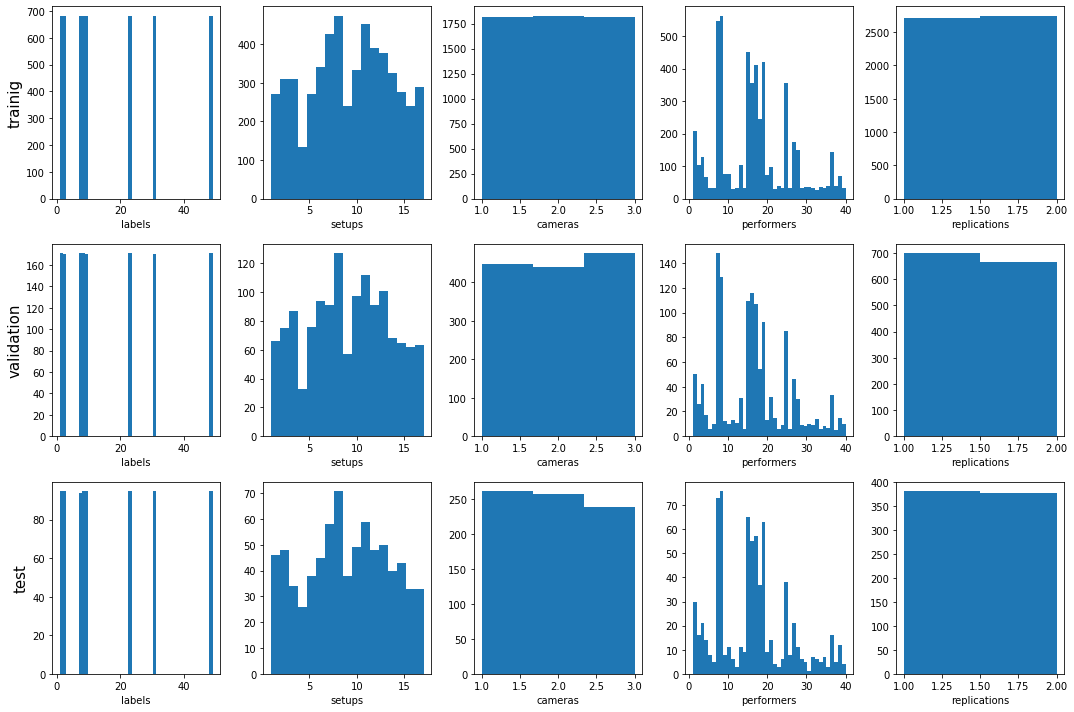

In [90]:
import matplotlib.pyplot as plt

xLabels = ["labels", "setups", "cameras", "performers", "replications"]
yLabels = ["trainig", "validation", "test"]
fig, axes = plt.subplots(nrows=3, ncols=5)
fig.set_size_inches(15,10)
for ids, dataSet in enumerate([read_train_set, read_val_set, read_test_set]):
    axes[ids][0].set_ylabel(yLabels[ids],fontsize = 15)
    for iid, data in enumerate(dataSet[1:]):
        axes[ids][iid].set_xlabel(xLabels[iid],fontsize = 10)
        axes[ids][iid].hist(data, bins = max(data))
fig.tight_layout()
plt.show()
        

# splitting dataset in same train-val-test for every model

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import numpy as np 

def getStringList(labels, setups, cameras, performers, replications):
    strList = []
    for i in range(len(labels)):
        strList.append("{} {} {} {} {}".format(labels[i],setups[i],cameras[i],performers[i],replications[i]))
    return strList

print("LOADING 'keypoint_rcnn_X_101_32x8d_FPN_3x' AS REFERENCE")
with open(DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle","rb") as file_in:
        trainSet_ref, valSet_ref, testSet_ref = pickle.load(file_in)

stringListTrain = getStringList(*trainSet_ref[1:])
stringListVal = getStringList(*valSet_ref[1:])
stringListTest = getStringList(*testSet_ref[1:])

print("ADAPTING 'PoseNet-101' following the reference")
with open(DATASET_FOLDER+"PoseNet-101-dataset.pickle","rb") as file_in:
    readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications = pickle.load(file_in)

readOnes = [readFeatures, readLabels, readSetups, readCameras, readPerformers, readReplications]
stringListGlobal = getStringList(*readOnes[1:])

print("get the indexes of train-val-test elements")
train_idx = [stringListGlobal.index(el) for el in stringListTrain]
val_idx = [stringListGlobal.index(el) for el in stringListVal]
test_idx = [stringListGlobal.index(el) for el in stringListTest]

print("creating the train-val-test set following the previously calculated indexes")
trainSet = [el[train_idx] for el in readOnes]
valSet = [el[val_idx] for el in readOnes]
testSet = [el[test_idx] for el in readOnes]


with open(DATASET_FOLDER+"PoseNet-101-SPLIT_AS_DETECTRON-dataset.pickle", 'wb') as handle:
    pickle.dump((trainSet, valSet, testSet), handle, protocol=pickle.HIGHEST_PROTOCOL)

print("DONE!")

LOADING 'keypoint_rcnn_X_101_32x8d_FPN_3x' AS REFERENCE
ADAPTING 'PoseNet-101' following the reference
get the indexes of train-val-test elements
creating the train-val-test set following the previously calculated indexes
DONE!


## check if the dataset are equal

In [61]:
dataset_1 = DATASET_FOLDER+"keypoint_rcnn_X_101_32x8d_FPN_3x-SPLIT-dataset.pickle"
with open(dataset_1,"rb") as file_in:
        trainSet_1, valSet_1, testSet_1 = pickle.load(file_in)

dataset_2 = DATASET_FOLDER+"PoseNet-101-SPLIT-dataset.pickle"
with open(dataset_2,"rb") as file_in:
        trainSet_2, valSet_2, testSet_2 = pickle.load(file_in)

In [69]:
all(trainSet_1[1] == trainSet_2[1])

True

# Building cross-view and cross-subject dataset 
### (as in the paper: https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Shahroudy_NTU_RGBD_A_CVPR_2016_paper.pdf)

In [2]:
DATASET_FOLDER = "/data/students_home/amoscatelli/Desktop/actionAnalysis/datasets/"

In [1]:
# for cross-subject
TRAINING_SUBJECTS = [1, 2, 4, 5, 8, 9, 13, 14, 15, 16, 17, 18, 19, 25, 27, 28, 31, 34, 35, 38]

#for cross-view
TRAINING_CAMERAS = [2, 3]

In [4]:
import pickle
with open(DATASET_FOLDER+"PoseNet-101"+"-SPLIT-dataset.pickle","rb") as file_in:
        splitDataset1 = pickle.load(file_in)

In [18]:
import numpy as np
concatenation = np.concatenate((splitDataset1[0][0],splitDataset1[0][0]))

In [20]:
concatenation.shape

(10920,)

In [ ]:
import numpy as np
def mergeSplitDatasets(splitDataset1,splitDataset2):
    features, labels, setups, cameras, performers, replications = [[] for i in range(6)]
    newSet = [features, labels, setups, cameras, performers, replications]
    for datasetIdx in range(3): # train set, val-set, test-set
        for elemIdx in range(len(newSet)): # features, labels, setups, cameras, performers, replications
            newSet[newSet] = np.concatenate((newSet[newSet],splitDataset1[datasetIdx][elemIdx]))
            
    
    ### Build hashset of current elements
    hashset = set()
    for i in range(len(features)):
        
    
    return features, labels, setups, cameras, performers, replications
    

In [9]:
import pickle
for modelName in ["PoseNet-101","keypoint_rcnn_X_101_32x8d_FPN_3x"]:
#     labelsDone = set()
    with open(DATASET_FOLDER+modelName+"-SPLIT-dataset.pickle","rb") as file_in:
        splitDataset1 = pickle.load(file_in)
    
    with open(DATASET_FOLDER+modelName+"-SPLIT-SENESI-dataset.pickle","rb") as file_in:
        splitDataset2 = pickle.load(file_in)
    
    
    loadedFeatures, loadedLabels, loadedSetups, loadedCameras, loadedPerformers, loadedReplications = mergeSplitDatasets(splitDataset1,splitDataset2)
    loadedOnes = [loadedFeatures, loadedLabels, loadedSetups, loadedCameras, loadedPerformers, loadedReplications]
    
    trainSetCrossSubject = [[] for i in range(6)]
    testSetCrossSubject = [[] for i in range(6)]
    trainSetCrossView = [[] for i in range(6)]
    testSetCrossView = [[] for i in range(6)]
    for i in range(len(readFeatures)):
        
        #### Cross-Subject splitting ########
        targetDataset = trainSetCrossSubject if loadedPerformers[i] in TRAINING_SUBJECTS else testSetCrossSubject
        for featureIdx in range(6):
                targetDataset[featureIdx].append(loadedOnes[featureIdx][i])
        
        #### Cross-View splitting ########
        targetDataset = trainSetCrossView if loadedCameras[i] in TRAINING_CAMERAS else testSetCrossView
        for featureIdx in range(6):
                targetDataset[featureIdx].append(loadedOnes[featureIdx][i])
            
    
    ## Save the results in dataset-Cross-view and dataset-Cross-subject
    
    
    

NameError: name 'mergeSplitDatasets' is not defined

In [15]:
import pickle
with open(DATASET_FOLDER+"PoseNet-101"+"-SPLIT-dataset.pickle","rb") as file_in:
        splitDataset1 = pickle.load(file_in)

5460

In [9]:
loadedTrainSet = np.array([1,2,3,4,5,6])
loadedValSet = np.array([7,8,9,10,11,12])
loadedTestSet = np.array([13,14,15,16,17,18])

In [11]:
loadedTestSet.shape

(6,)

In [10]:
import numpy as np
np.concatenate((loadedTrainSet,loadedValSet,loadedTestSet),axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1